C:\Users\Tim-K\AppData\Local\Temp\ipykernel_13268\984158220.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = data_df.loc[data_df["targetDist1"] == target].append(data_df.loc[data_df["targetDist2"] == target])
C:\Users\Tim-K\AppData\Local\Temp\ipykernel_13268\984158220.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = data_df.loc[data_df["targetDist1"] == target].append(data_df.loc[data_df["targetDist2"] == target])
C:\Users\Tim-K\AppData\Local\Temp\ipykernel_13268\984158220.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = data_df.loc[data_df["targetDist1"] == target].append(data_df.loc[data_df["targetDist2"] == target])
C:\Users\Tim-K\AppData\Local\Temp\ipykernel_13268\984158220.py:51: Fut

(array([], dtype=int64),)


c:\Users\Tim-K\miniconda3\envs\expra\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


Results.Fit:  [4.89821042e+00 3.28313264e+00 8.36696280e-09 5.00000000e-01
 4.48971574e-08]
Results.conf_Intervals:  [[[4.28828395e+00 4.36059851e+00 4.53106137e+00]
  [5.48917677e+00 5.35604171e+00 5.12079052e+00]]

 [[6.17978820e-01 8.59163886e-01 1.66673891e+00]
  [4.78316767e+00 4.50246020e+00 3.86575072e+00]]

 [[1.42049700e-03 2.84099399e-03 9.11876560e-03]
  [1.16249521e-01 9.99130181e-02 6.92640979e-02]]

 [[5.00000000e-01 5.00000000e-01 5.00000000e-01]
  [5.00000000e-01 5.00000000e-01 5.00000000e-01]]

 [[4.75783079e-03 9.51566159e-03 3.39694255e-02]
  [4.07080434e-01 3.62803854e-01 2.70446261e-01]]]


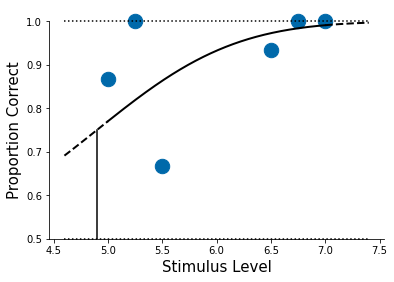

<AxesSubplot:xlabel='Stimulus Level', ylabel='Proportion Correct'>

In [73]:
# imports
import numpy as np
import pandas as pd
import psignifit as ps 
import matplotlib.pyplot as plt
import glob

participant_id = "Tim_001" # Name of folder for participant

path = "C:/Dropbox/Experiment Data/exp2-tim-psychophysics/" + participant_id + "/S001/trial_results.csv" # Path to data for participant

data_df = pd.read_csv(path) # Read experiment files for participant

stimulus_distances = data_df["stimulusDistance"].unique() # All different stimulus distances (including reference distance)

reference_distance = data_df["referenceDistance"][0] # Reference distance (either 6 or 3)

target_distances = np.delete(stimulus_distances, np.where(stimulus_distances == reference_distance)) # All different stimulus distances (excluding reference distance)



row1 = data_df.loc[data_df["targetDist1"] == 6.5]

correct_answer = 0

current_row = row1.iloc[3]

if current_row.get(["targetDist1"][0]) > current_row.get(["targetDist2"][0]):
    correct_answer = 1

#print(correct_answer)

participant_answer = 0

if current_row.get(["answer"][0]) == "right":
    participant_answer = 1

#print(participant_answer)

#print(row1.iloc[0])
#print(current_row.get(["answer"][0]))


# data sollte in Form np.array([ [stimulus_level, nCorrect, nTotal] ])


def getDataAsArray():
    data = []

    for target in target_distances:
        table = data_df.loc[data_df["targetDist1"] == target].append(data_df.loc[data_df["targetDist2"] == target])

        nCorrect = 0
        nTotal = 0

        for i in range(len(table)):
            row = table.iloc[i]
            if row.get(["targetDist1"][0]) < row.get(["targetDist2"][0]):
                correct_answer = 0
            else:
                correct_answer = 1
            if row.get(["answer"][0]) == "left":
                participant_answer = 0
            else:
                participant_answer = 1

            if correct_answer == participant_answer:
                nCorrect += 1
            
            nTotal += 1
        
        data.append([target, nCorrect, nTotal])

    return np.array(data)
data = getDataAsArray()



options = dict()
options['sigmoidName'] = 'norm'
options['expType'] = '2AFC'


results = ps.psignifit(data, options) # Get results

print(f"Results.Fit: ", results['Fit'])
print(f"Results.conf_Intervals: ", results['conf_Intervals'])

ps.psigniplot.plotPsych(results) # Plot results
